<a href="https://colab.research.google.com/github/AishwaryaVelumani/Deep-Learning/blob/master/Binary_classification_on_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)= imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [6]:
import numpy as np

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index= dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review= ''.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
def vectorize_sequences(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train= np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

In [11]:
type(y_train)

numpy.ndarray

In [12]:
type(x_train)

numpy.ndarray

In [13]:
from keras import models 
from keras import layers

In [14]:
model= models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
#model.compile(optimizer='rmsprop',
 #             loss='binary_crossentropy',
  #            metrics=['accuracy'])

In [17]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [18]:
x_val=x_train[:10000]
partial_x_train= x_train[10000:]
y_val=y_train[:10000]
partial_y_train= y_train[10000:]

In [19]:
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5066 - binary_accuracy: 0.7963 - val_loss: 0.3813 - val_binary_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3040 - binary_accuracy: 0.9027 - val_loss: 0.3188 - val_binary_accuracy: 0.8768
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2222 - binary_accuracy: 0.9271 - val_loss: 0.2827 - val_binary_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1734 - binary_accuracy: 0.9443 - val_loss: 0.2734 - val_binary_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1422 - binary_accuracy: 0.9543 - val_loss: 0.2914 - val_binary_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1152 - binary_accuracy: 0.9657 - val_loss: 0.2941 - val_binary_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - los

In [20]:
history_dict= history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

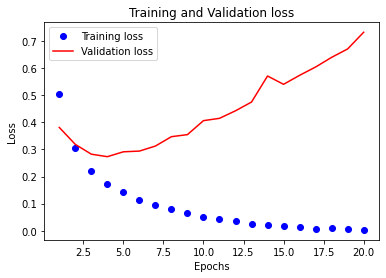

In [25]:
import matplotlib.pyplot as plt

loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
acc= history_dict['binary_accuracy']
val_acc= history_dict['val_binary_accuracy']

epochs=range(1,len(acc)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

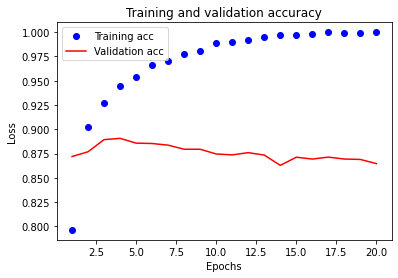

In [26]:
plt.clf()
acc_values= history_dict['binary_accuracy']
val_acc_values= history_dict['val_binary_accuracy']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
results= model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2032 - binary_accuracy: 0.9454
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1330 - binary_accuracy: 0.9591
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1028 - binary_accuracy: 0.9686
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.4870 - binary_accuracy: 0.8597


In [30]:
model1= models.Sequential()
model1.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model1.add(layers.Dense(16,activation='relu'))
model1.add(layers.Dense(1,activation='sigmoid'))

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model1.fit(x_train,y_train,epochs=4,batch_size=512)
results= model.evaluate(x_test,y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4485 - accuracy: 0.8234
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2544 - accuracy: 0.9083
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1963 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.4870 - binary_accuracy: 0.8597
[0.4870162010192871, 0.8596799969673157]


In [31]:
model1.predict(x_test)

array([[0.22577688],
       [0.999586  ],
       [0.9404254 ],
       ...,
       [0.1952371 ],
       [0.11570984],
       [0.7521833 ]], dtype=float32)